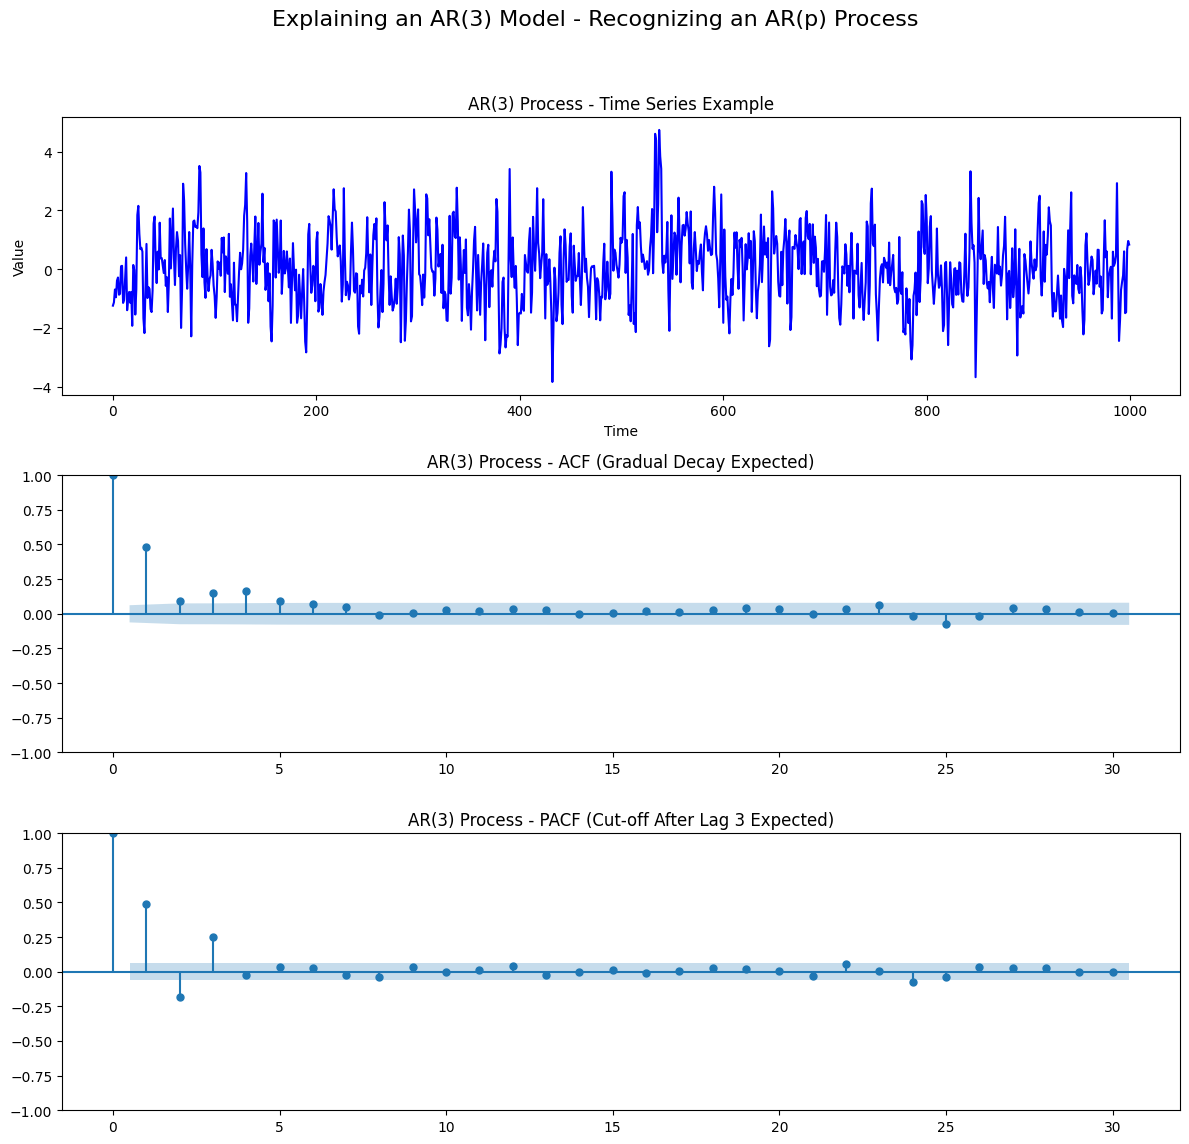

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
#pip install statsmodels numpy matplotlib

# Define parameters for a general AR(3) model
ar_params_general = [1, -0.6, 0.3, -0.2]  # AR(3) coefficients
n = 1000 # Number of observations for a clearer view

# Generate data for the AR(3) process
ar3_process = ArmaProcess(ar_params_general, [1])
ar3_data = ar3_process.generate_sample(nsample=n)

# Plotting the ACF, PACF, and the time series to explain AR(p) recognition
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle("Explaining an AR(3) Model - Recognizing an AR(p) Process", fontsize=16)

# Plot time series
ax[0].plot(ar3_data, color='blue')
ax[0].set_title("AR(3) Process - Time Series Example")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")

# ACF plot
sm.graphics.tsa.plot_acf(ar3_data, lags=30, ax=ax[1])
ax[1].set_title("AR(3) Process - ACF (Gradual Decay Expected)")

# PACF plot
sm.graphics.tsa.plot_pacf(ar3_data, lags=30, ax=ax[2])
ax[2].set_title("AR(3) Process - PACF (Cut-off After Lag 3 Expected)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


This visualization illustrates a stationary AR(3) model and demonstrates how to recognize it through its characteristic properties:

Time Series Plot:

Shows the generated data for an AR(3) process with subtle fluctuations, influenced by past values up to three lags.

Autocorrelation Function (ACF):

The ACF displays a gradual decay, typical for AR processes, as it reflects the model's ongoing dependency on past values. In this case, the decay is slightly oscillatory due to the negative coefficients.
Partial Autocorrelation Function (PACF):

The PACF cuts off sharply after lag 3, which is characteristic of an AR(3) process. This cutoff indicates that only the first three lags directly influence the current value in this model.
For AR(𝑝) models in general, the PACF cut-off at lag 𝑝 serves as a primary indicator of the model's order, while the ACF shows a slower decay that varies with the specific parameters. This pattern of a sharp cutoff in the PACF is key to identifying the AR order.

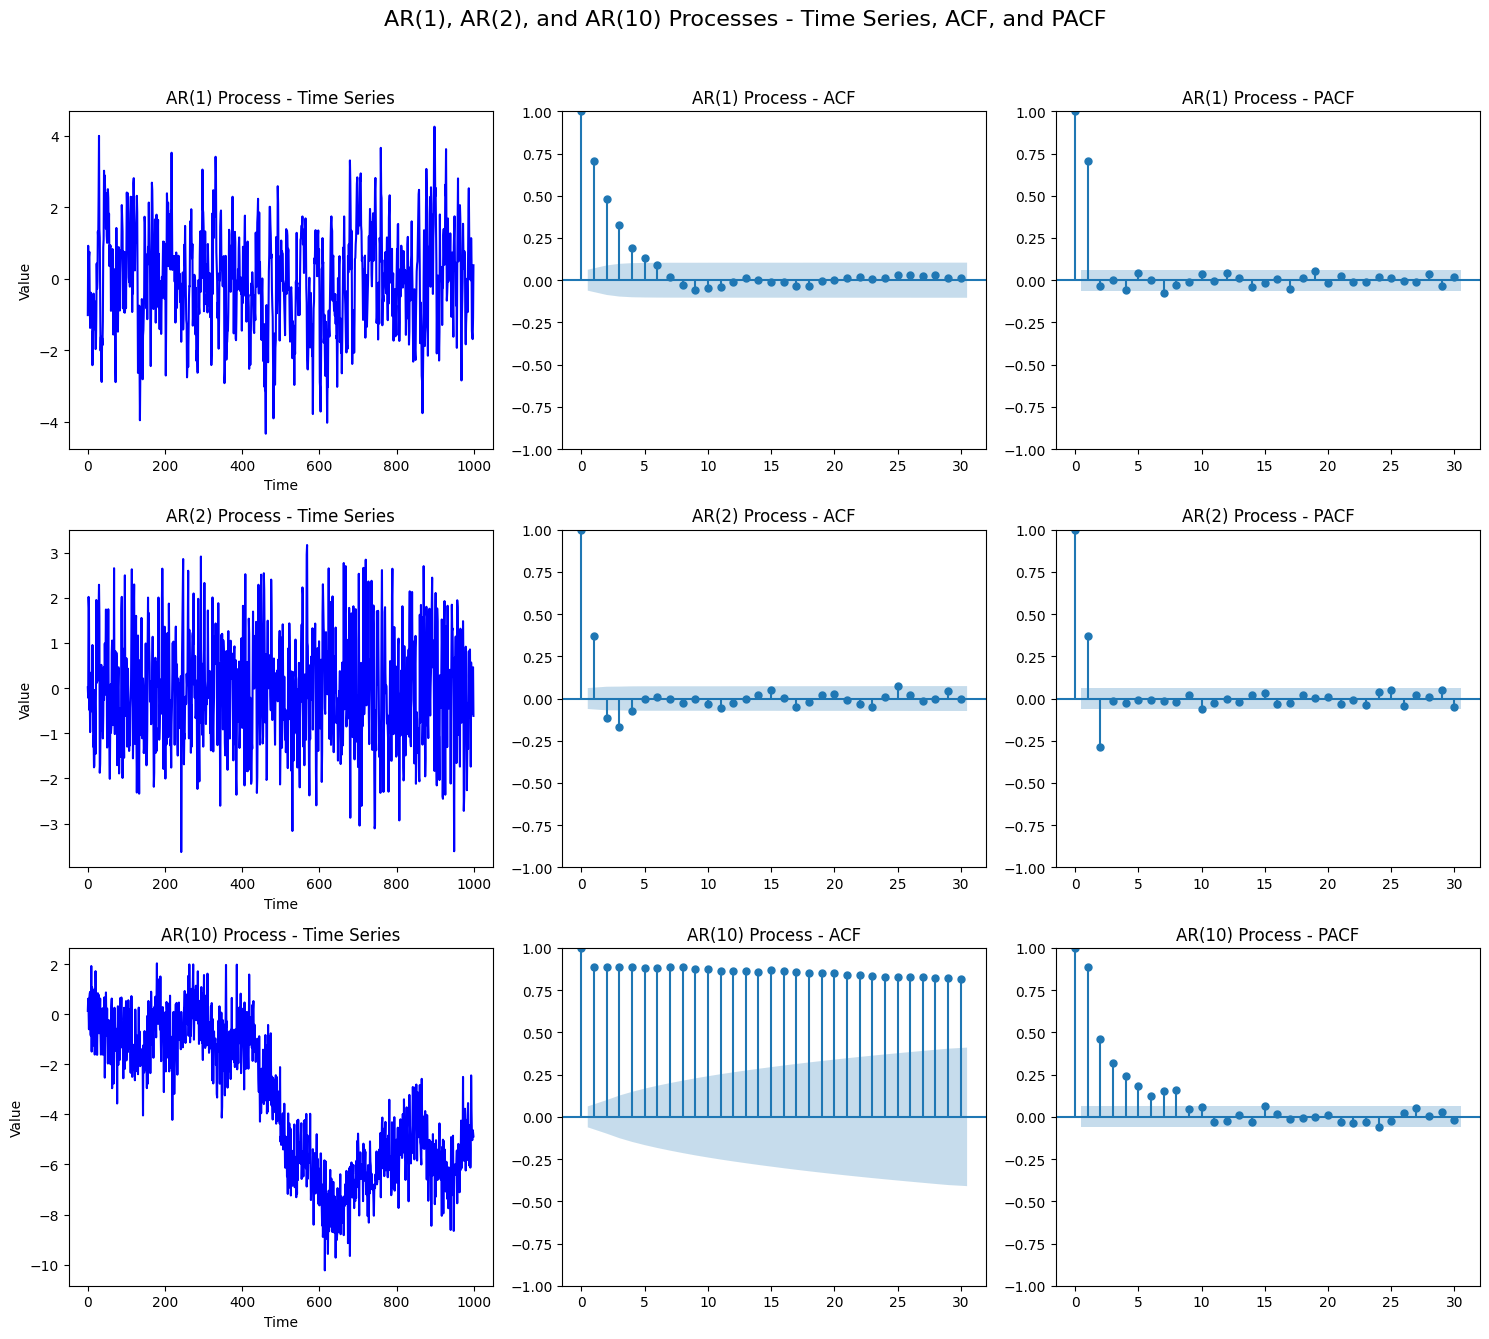

In [5]:
# Define AR parameters for AR(1), AR(2), and a high-order AR model to mimic asymptotic behavior (AR(10))
ar_params_list = {
    'AR(1)': [1, -0.7],          # AR(1) with coefficient 0.7
    'AR(2)': [1, -0.5, 0.3],     # AR(2) with coefficients 0.5 and 0.3
    'AR(10)': [1] + [-0.1] * 10  # AR(10) with smaller coefficients to show long decay
}

n = 1000  # Number of observations

# Plot for AR(1), AR(2), and AR(10) showing time series, ACF, and PACF
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("AR(1), AR(2), and AR(10) Processes - Time Series, ACF, and PACF", fontsize=16, y=0.92)

for i, (model, params) in enumerate(ar_params_list.items()):
    # Generate data for the AR process
    ar_process = ArmaProcess(params, [1])
    ar_data = ar_process.generate_sample(nsample=n)

    # Plot time series
    axs[i, 0].plot(ar_data, color='blue')
    axs[i, 0].set_title(f"{model} Process - Time Series")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Value")

    # Plot ACF
    sm.graphics.tsa.plot_acf(ar_data, lags=30, ax=axs[i, 1])
    axs[i, 1].set_title(f"{model} Process - ACF")

    # Plot PACF
    sm.graphics.tsa.plot_pacf(ar_data, lags=30, ax=axs[i, 2])
    axs[i, 2].set_title(f"{model} Process - PACF")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


Here are the time series, ACF, and PACF plots for AR(1), AR(2), and AR(10) models, illustrating how these differ across increasing orders and mimic asymptotic behavior:

**AR(1)**:
Time Series: Exhibits smooth fluctuations influenced by a single lag.
ACF: Shows an exponential decay typical for an AR(1) process.
PACF: Cuts off sharply after lag 1, indicating a single-lag dependency.

**AR(2)**:
Time Series: Displays more complex fluctuations compared to AR(1).
ACF: Shows a slower decay, often oscillatory, reflecting the second lag’s influence.
PACF: Cuts off after lag 2, characteristic of an AR(2) model.

**AR(10)**:
Time Series: The series is more volatile, reflecting dependencies from multiple past values.
ACF: Shows a very gradual, long decay, mimicking an asymptotic trend due to the high lag order.
PACF: Significant spikes extend up to lag 10, indicating multiple direct lag influences.
These plots demonstrate the progressive increase in complexity and the asymptotic-like behavior as the order 𝑝 grows, especially visible in the ACF decay for high-order AR models like AR(10)